# HomeWork 9

**DeadLine : 23:59 19 Azar 1401**

**Total points : 100pts**


Import some prerequisites:

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Run this cell for plotting.

In [2]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

# PART 3

**Point : 35 pts**

Here is for your helper functions(optional).

In [ ]:
def dilation(image: np.array, kernel: np.array) -> np.array:
    output = np.zeros_like(image)
    image_padded = np.zeros(
        (image.shape[0] + kernel.shape[0] - 1, image.shape[1] + kernel.shape[1] - 1)
    )

    # Copy image to padded image
    image_padded[kernel.shape[0] - 2 : -1 :, kernel.shape[1] - 2 : -1 :] = image

    # Iterate over image & apply kernel
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            summation = (
                kernel * image_padded[y : y + kernel.shape[0], x : x + kernel.shape[1]]
            ).sum()
            output[y, x] = 255 if summation > 0 else 0
    return output

In [ ]:
def erosion(image: np.array, kernel: np.array) -> np.array:
    output = np.zeros_like(image)
    image_padded = np.zeros(
        (image.shape[0] + kernel.shape[0] - 1, image.shape[1] + kernel.shape[1] - 1)
    )

    # Copy image to padded image
    image_padded[kernel.shape[0] - 2 : -1 :, kernel.shape[1] - 2 : -1 :] = image

    # Iterate over image & apply kernel
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            summation = (
                kernel * image_padded[y : y + kernel.shape[0], x : x + kernel.shape[1]]
            ).sum()
            output[y, x] = 255 if summation == kernel.sum() * 255 else 0
    return output

In [ ]:
def openning(image: np.array, kernel: np.array) -> np.array:
  
  img_copy = image.copy()
  img_erode = erosion(img_copy, kernel)
  img_open = dilation(img_erode, kernel)

  return img_open

In [ ]:
structure_element = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0],
],np.uint8)

Implement this function to get the input image and return the skeleton of the input image.

In [ ]:
def get_skeleton(image):
    """
    Finds the skeleton of the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The skeleton image.  
        numpy.ndarray: The parameters required for reconstructing image
    """
    
    res = image.copy()
    params = {}
    sk_list = []
    ret, res = cv2.threshold(image,127,255,cv2.THRESH_BINARY_INV) 
    # Get skeleton
    s_k=np.zeros(shape=image.shape)
    k=0

    skeleton_ak = res - openning(res,structure_element)
    sk_list.append(skeleton_ak)
    s_k=s_k + skeleton_ak

    while 255 in erosion(res, structure_element):
      # Erode image
      res = erosion(res,structure_element)
      k += 1

      # Open image
      res_open = openning(res,structure_element)

      # Erode image - Open image
      skeleton_ak = res-res_open
      sk_list.append(skeleton_ak)

      # Union
      s_k=s_k + skeleton_ak


    res=s_k
    params['K']=k
    params['SK']=s_k
    params['sks'] = sk_list
    
    return res, params

Test your implementation (don't change this cell).

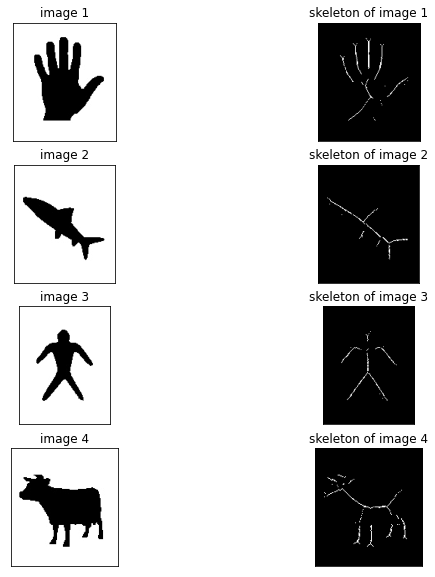

In [ ]:
image_list = []

image1 = cv2.imread('img1.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_skeleton, params1 = get_skeleton(image1)
image_list.append([image1_skeleton, 'skeleton of image 1','img'])

image2 = cv2.imread('img2.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_skeleton, params2 = get_skeleton(image2)
image_list.append([image2_skeleton, 'skeleton of image 2','img'])

image3 = cv2.imread('img3.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_skeleton, params3 = get_skeleton(image3)
image_list.append([image3_skeleton, 'skeleton of image 3', 'img'])

image4 = cv2.imread('img4.jpg', cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_skeleton, params4 = get_skeleton(image4)
image_list.append([image4_skeleton, 'skeleton of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q3-a')

Implement this function to get the input image as skeleton and return the reconstruction of the skeleton.

In [ ]:
def recons_skeleton(image, params):
    """
    Finds the original image from the skeleton.
    
    Parameters:
        image (numpy.ndarray): The skeleton of image.
        params (numpy.ndarray): The parameters required for reconstructing image
    
    Returns:
        numpy.ndarray: The original image.  
    """
    
    res = image.copy()
    sk_list = params['sks']
    k = params['K']
    sk = params['SK']

    A = sk_list[0]
    for i in range(1, k):
        dilate_sk = sk_list[i]
        for j in range(i):
            # k dilation of skeleton k with structuring element
            dilate_sk = dilation(dilate_sk, structure_element)
        A += dilate_sk

    res = A

    
    #Write your code here
    
    
    return res

Test your implementation (don't change this cell).

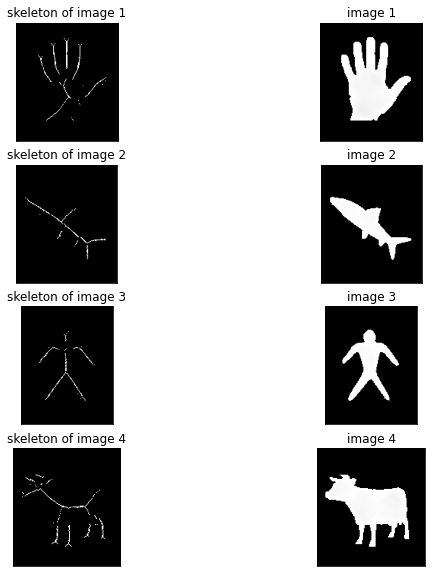

In [ ]:
image_list = []

image_list.append([image1_skeleton, 'skeleton of image 1', 'img'])
image_list.append([recons_skeleton(image1_skeleton, params1), 'image 1','img'])

image_list.append([image2_skeleton, 'skeleton of image 2', 'img'])
image_list.append([recons_skeleton(image2_skeleton, params2), 'image 2','img'])

image_list.append([image3_skeleton, 'skeleton of image 3', 'img'])
image_list.append([recons_skeleton(image3_skeleton, params3), 'image 3', 'img'])

image_list.append([image4_skeleton, 'skeleton of image 4', 'img'])
image_list.append([recons_skeleton(image4_skeleton, params4), 'image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q3-b')

# PART 4

**Point : 30 pts**

Here is for your helper functions(optional).

In [3]:
from google.colab.patches import cv2_imshow
import imutils

Implement this function to detect shapes and number of cars in an input image.

In [4]:
def detect_car_num(image):
    '''
    Detects shapes and number of cars in the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
        integer: number of cars
    '''
    
    result = image.copy()
    cars_num = 0
    
    # Converting to gray, Blurring and adaptive threshold
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 21, 18)

    # opening to remove noises
    kernelSize = (5, 5)
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, kernelSize)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

    # closing - remove black holes
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kernelSize)
    closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    # dilation - to amplify h and v borders
    kernel = np.ones((5, 5), np.uint8)
    kernel[:,0] = kernel[:,-1] = 0
    dilated = cv2.dilate(closing.copy(), kernel, iterations=1)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,
	  cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)

    min_width_rec = 30
    min_height_rec = 15

    for c in cnts: 
      rectangle = cv2.boundingRect(c)
      x = rectangle[0]
      y = rectangle[1]
      w = rectangle[2]
      h = rectangle[3]
      
      if w >= min_width_rec and h >= min_height_rec:
        cv2.rectangle(result, (x-15,y-15), (x+w+15,y+h+15), (0,255,127), 2)
        cars_num += 1
    
    
    return result, cars_num

Test your implementation (don't change this cell).

Car count:  19


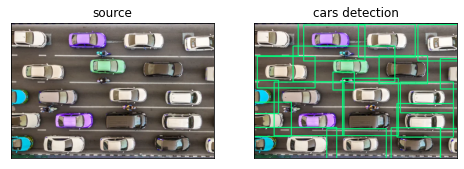

In [5]:
image_list = []
image = cv2.imread('img5.jpg', cv2.IMREAD_COLOR)
image_list.append([image, 'source', 'img'])
image_list.append([detect_car_num(image)[0], 'cars detection', 'img'])
print("Car count: ", detect_car_num(image)[1])
plotter(image_list, 1, 2, True, 8, 6, 'Q4-a')

Implement this function to detect shapes and number of flowers in an input image.

In [ ]:
def detect_flower_num(image):
    '''
    Detects shapes and number of flowers in the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
        integer: number of flowers
    '''
    
    result = image.copy()
    flowers_num = None
    
    #Write your code here
    
    
    
    return result,flowers_num

Test your implementation (don't change this cell).

In [ ]:
image_list = []
image = cv2.imread('img6.jpg', cv2.IMREAD_COLOR)
image_list.append([image, 'source', 'img'])
image_list.append([detect_flower_num(image)[0], 'flowers detection', 'img'])
plotter(image_list, 1, 2, True, 8, 6, 'Q4-b')

End!!!